# Data and Decisions - Individual Assignment

Assignment Brief

Looking at customer churn in the Telco Dataset

*What according to you are the most important determinants of customer churn at this company? Present convincing arguments based on insights from the dataset and/or other research about the industry*

*What are the limitations of your argument?*

*Based on your analysis propose possible interventions or next steps that the management team should consider*

*Please be precise and suggest mechanisms to test the impact of the interventions*

Consider the Data Workflow

**Classifying**. We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.

**Correlating**. One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.

**Converting**. For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.

**Completing**. Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.

**Correcting**. We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.

**Creating**. Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.

**Charting**. How to select the right visualization plots and charts depending on nature of the data and the solution goals.


# Problem Formulation

In many (business) cases it is equally important to not only have an accurate, but also an interpretable model. Oftentimes, apart from wanting to know what our model’s house price prediction is, we also wonder why it is this high/low and which features are most important in determining the forecast. Another example might be predicting customer churn — it is very nice to have a model that is successfully predicting which customers are prone to churn, but identifying which variables are important can help us in early detection and maybe even improving the product/service!

In [2]:
from platform import python_version
print(python_version())
import sklearn
print(sklearn.__version__)
import numpy
print(numpy.__version__)
#import tensorflow
#print(tensorflow.__version__)
import matplotlib
print(matplotlib.__version__)

3.7.5
0.21.3
1.17.3
3.1.2


In [53]:
%matplotlib inline

# run block of code and catch warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

# Basic Libraries
import numpy as np
import pandas as pd

# Deep learning
#import tensorflow as tf

# Scikit-learn - Machine learning algorithms 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

# Not using yet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [6]:
# load data

telco_df = pd.read_csv("Telco-Customer-Churn-clean.csv")

In [7]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [10]:
#telco_df.info()

## Preprocessing

Dataset contained 11 missing values in TotalCharges. These records where removed from the dataset as they compirsed a very small amount of the data. It simplified the process to remove them rather than impute the values.



The preprocessing required will be around converting variables from categorical to numeric. As we can see in the data types above, there are some values that are continuous, but most are categorical objects. Depending on what kind of analysis tools we will be using we may have to process and clean the data.

Later we will need to select features to be used in the model, so let's explore the data.

## Exploratory Data Analysis
### Viz
To help with visualizing, found some functions to speed things up. Kindly shared on https://www.kaggle.com/jatturat/finding-important-factors-to-survive-titanic. Check for some insights on feature scaling

In [8]:
# Continuous Data Plot
def cont_plot(df, feature_name, target_name, palettemap, hue_order, feature_scale): 
    df['Counts'] = "" # A trick to skip using an axis (either x or y) on splitting violinplot
    fig, [axis0,axis1] = plt.subplots(1,2,figsize=(10,5))
    sns.distplot(df[feature_name], ax=axis0);
    sns.violinplot(x=feature_name, y="Counts", hue=target_name, hue_order=hue_order, data=df,
                   palette=palettemap, split=True, orient='h', ax=axis1)
    axis1.set_xticks(feature_scale)
    plt.show()

# Categorical Data Plot    
def cat_plot(df, feature_name, target_name, palettemap): 
    fig, [axis0,axis1] = plt.subplots(1,2,figsize=(10,5))
    df[feature_name].value_counts().plot.pie(autopct='%1.1f%%',ax=axis0)
    sns.countplot(x=feature_name, hue=target_name, data=df,
                  palette=palettemap,ax=axis1)
    plt.show()

# Setting colour palette for use
churn_palette = {0: "black", 1: "#47a2d6"} # Color map for visualization


Since there are many variables in the dataset, want to look at the relationships between the different variables - categorical and continuous - with churn

Below are the variables visualized

In [9]:
df_colnames = [col for col in telco_df.columns]
df_colnames = pd.DataFrame(df_colnames)

In [10]:
df_colnames

,0
0,customerID
1,gender
2,SeniorCitizen
3,Partner
4,Dependents
5,tenure
6,PhoneService
7,MultipleLines
8,InternetService
9,OnlineSecurity


In [11]:
df_colnames_cat = df_colnames.drop([0,5,18,19,20]).values
df_colnames_cont = df_colnames.loc[[5,18,19]].values

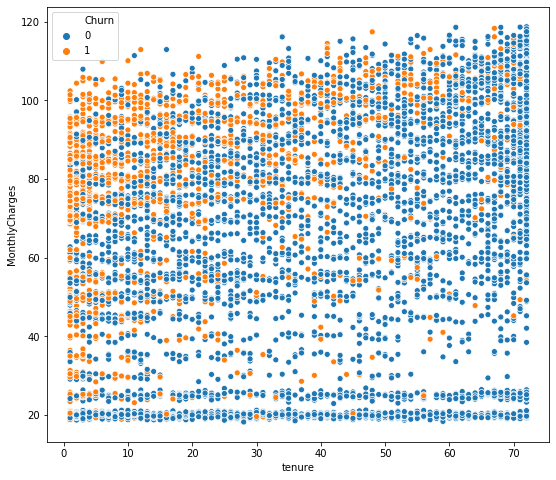

In [130]:
plt.figure(figsize=(9,8))
sns.scatterplot(x="tenure", y="MonthlyCharges", hue = "Churn", data=telco_df)

In [143]:
#sns.jointplot(x="TotalCharges", y="MonthlyCharges", kind = 'hex', data=telco_df)

In [210]:
#sns.pairplot(telco_df)

## Continuous Variables

/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


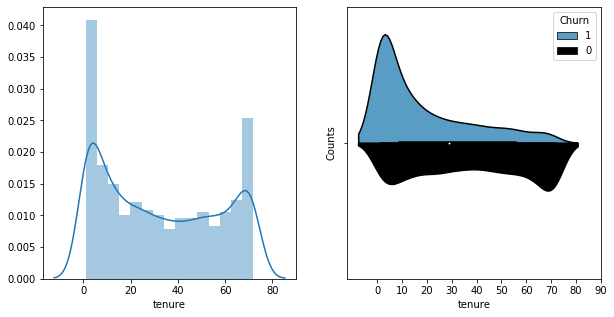

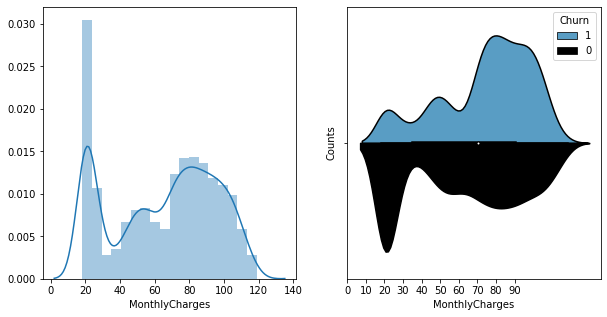

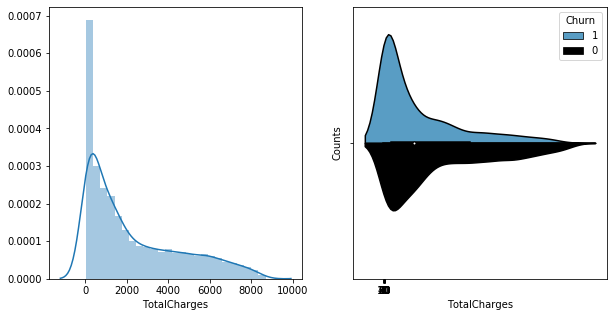

In [69]:
for lbl in df_colnames_cont:
    df = telco_df[[lbl[0],'Churn']]
    cont_plot(df, lbl[0], 'Churn', churn_palette, [1,0], range(0,100,10))


## Categorical Variables

gender


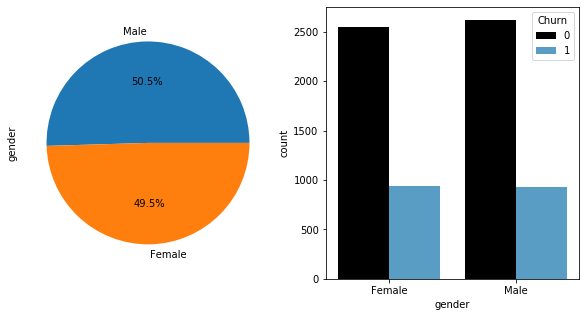

SeniorCitizen


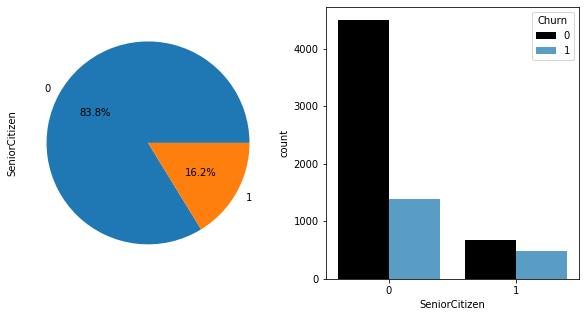

Partner


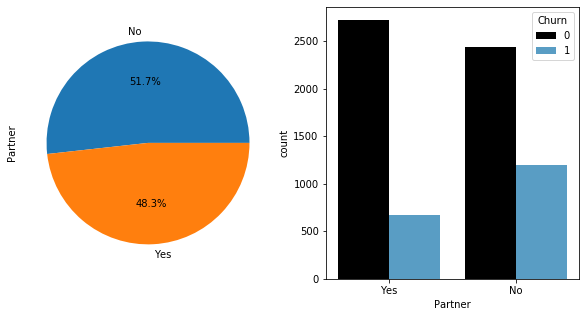

Dependents


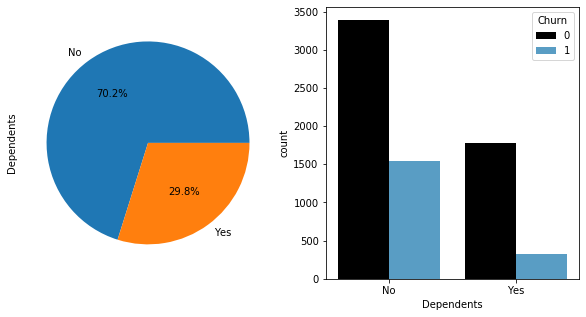

PhoneService


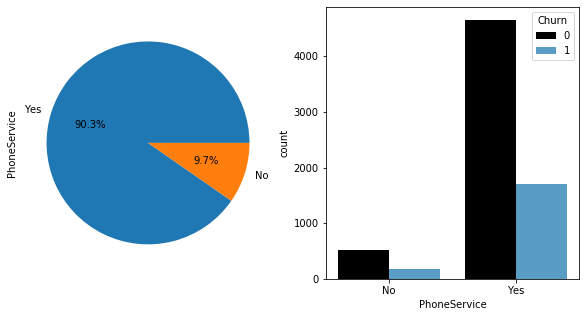

MultipleLines


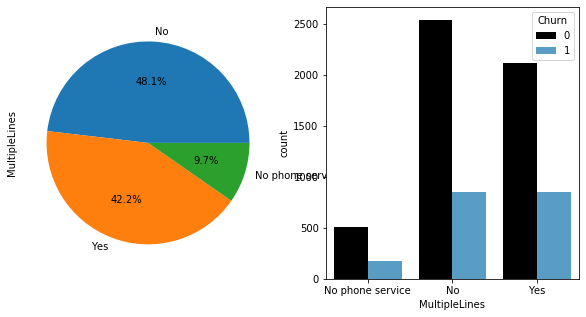

InternetService


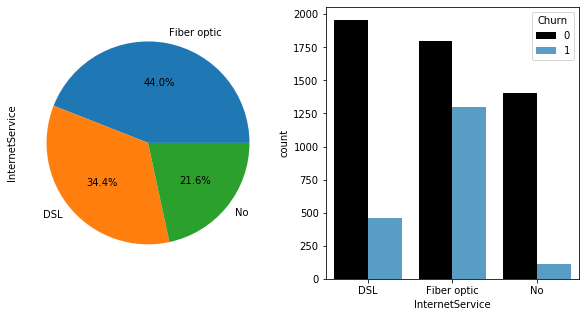

OnlineSecurity


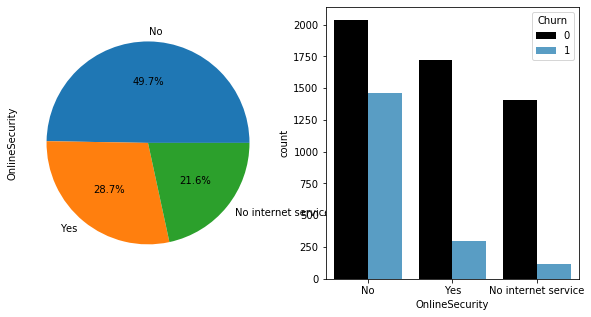

OnlineBackup


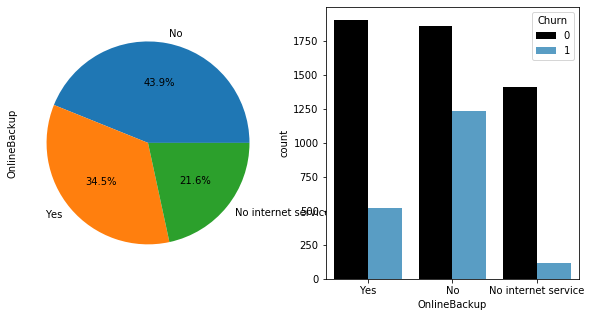

DeviceProtection


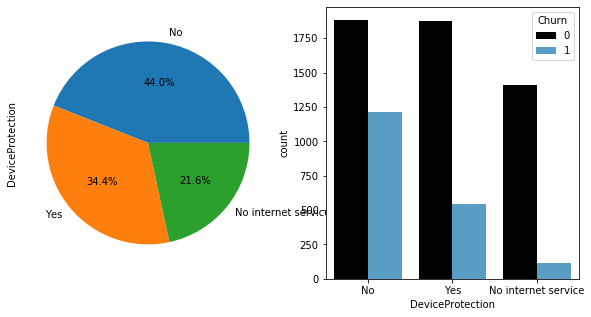

TechSupport


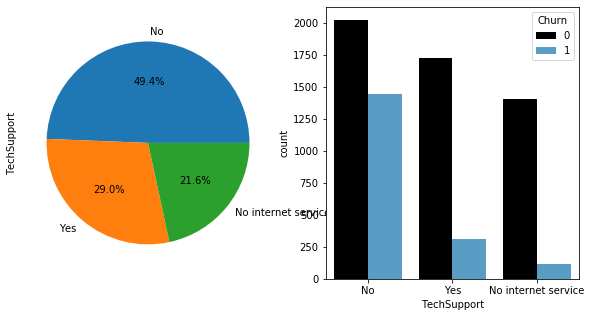

StreamingTV


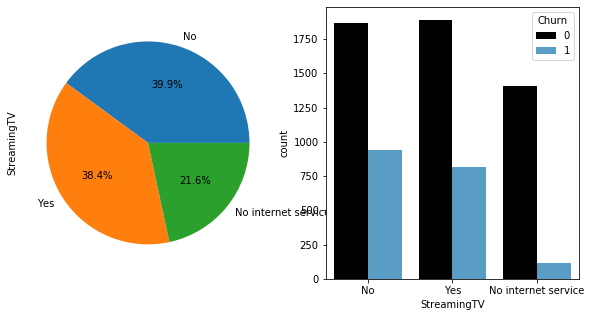

StreamingMovies


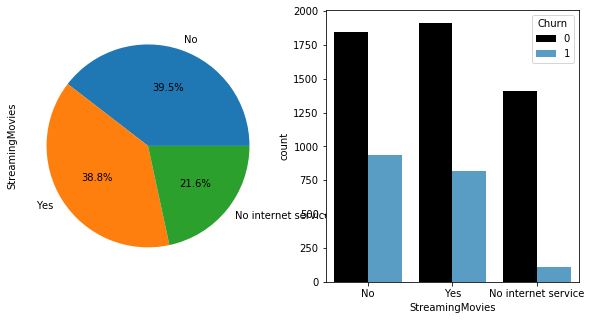

Contract


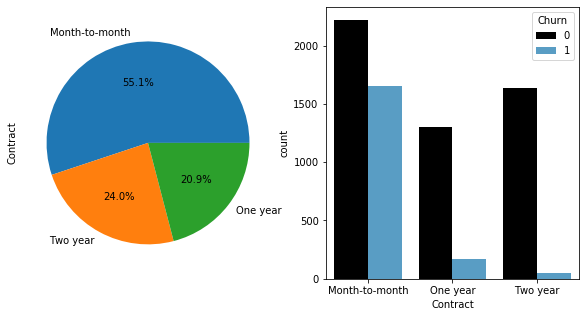

PaperlessBilling


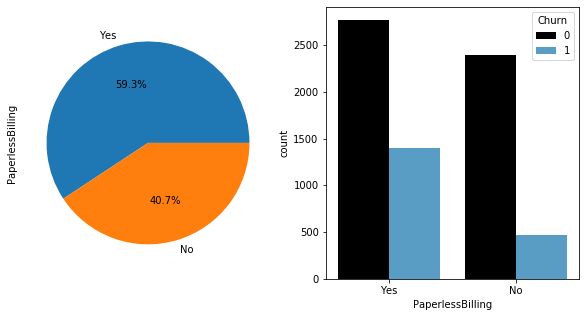

PaymentMethod


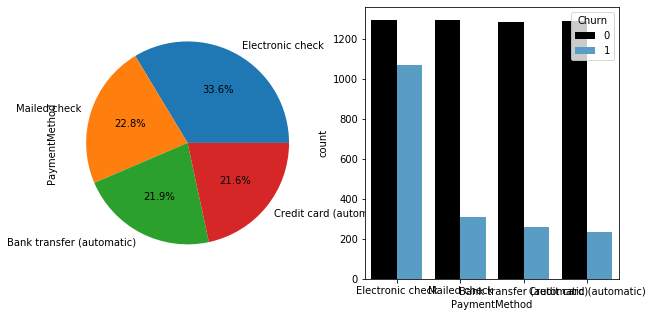

In [70]:
for lbl in df_colnames_cat:
    df = telco_df[[lbl[0],'Churn']]
    print(lbl[0])
    cat_plot(df,lbl[0],'Churn',churn_palette)

# Preprocessing

Since a lot of the data is categorical and I want to find out the most important variables using functions for confusion matrices etc, it's hard to do if the variables are in categorical form. I need to turn them to numbers or IDs

In [12]:
X_analysis = telco_df.drop(['customerID'], axis=1)

In [13]:
df_colnames.iloc[1].values

array(['gender'], dtype=object)

In [14]:
X_analysis['gender'] = X_analysis['gender'].map({'Male':0,'Female':1})
X_analysis['Partner'] = X_analysis['Partner'].map({'No':0,'Yes':1})
X_analysis['Dependents'] = X_analysis['Dependents'].map({'No':0,'Yes':1})
X_analysis['PhoneService'] = X_analysis['PhoneService'].map({'No':0,'Yes':1})
X_analysis['MultipleLines'] = X_analysis['MultipleLines'].map({'No phone service': 0,'No':1,'Yes':2})
X_analysis['InternetService'] = X_analysis['InternetService'].map({'No':0,'DSL':1,'Fiber optic':2})
                                          
for i in range(9,15):
    lbl = df_colnames.iloc[i].values
    X_analysis[lbl[0]] = X_analysis[lbl[0]].map({'No internet service':0,'No':1,'Yes':2})

X_analysis['Contract'] = X_analysis['Contract'].map({'Month-to-month':0,'One year':1,'Two year':2})
X_analysis['PaperlessBilling'] = X_analysis['PaperlessBilling'].map({'No':0,'Yes':1})
X_analysis['PaymentMethod'] = X_analysis['PaymentMethod'].map({'Electronic check':0,'Mailed check':1,
                                                               'Bank transfer (automatic)':2,'Credit card (automatic)':3})


In [15]:
X_analysis.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,1,1,2,1,1,1,1,0,1,0,29.85,29.85,0
1,0,0,0,0,34,1,1,1,2,1,2,1,1,1,1,0,1,56.95,1889.50,0
2,0,0,0,0,2,1,1,1,2,2,1,1,1,1,0,1,1,53.85,108.15,1
3,0,0,0,0,45,0,0,1,2,1,2,2,1,1,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,1,2,1,1,1,1,1,1,0,1,0,70.70,151.65,1


We've cleaned up the data quite a bit but still, to speed up some calculations we can also look to normalize the continuos variables

### Radar chart

### Correlation

To select features we can look at the correlation between them. Basically, if 2 features are highly correlated, they are probably roughly telling us the same thing and hance are probably not items we would want to use in our model since they would cause some overfitting and train very well but not test well.

However, we can't just drop the data, we must look to make sense of it

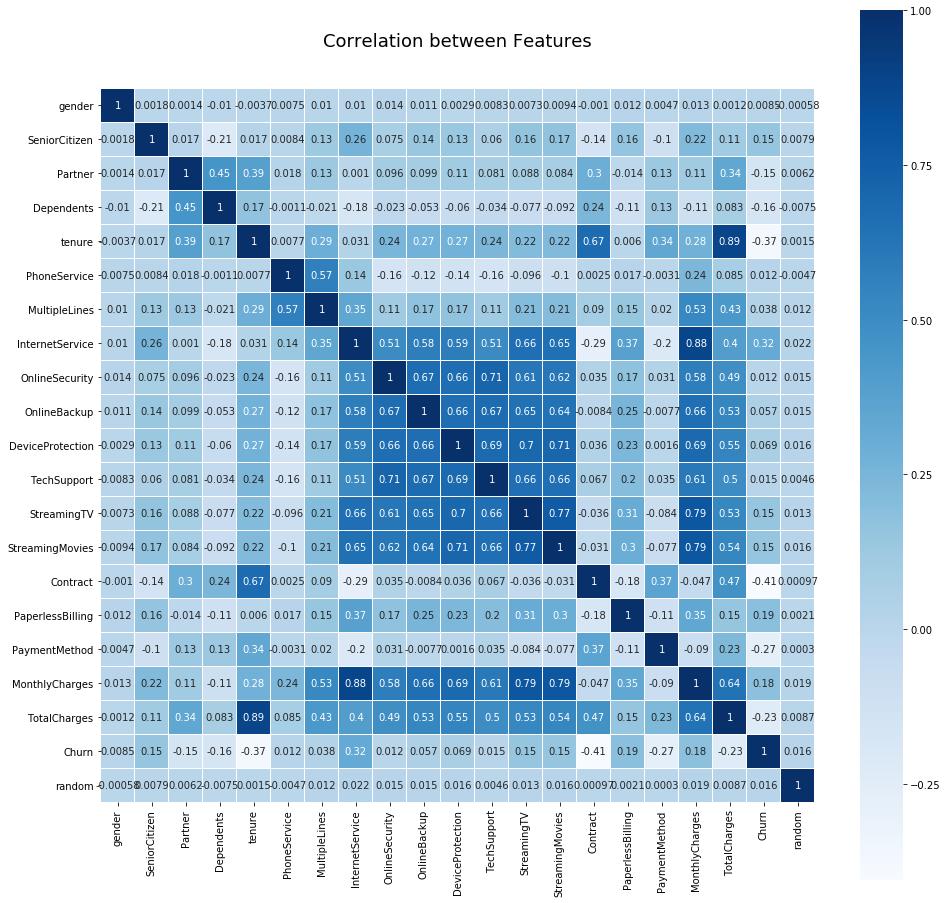

In [95]:
X_plt = X_analysis
X_plt['random'] = np.random.random(size = len(X_plt))

colormap = plt.cm.Blues
plt.figure(figsize=(16,16))
plt.title('Correlation between Features', y=1.05, size = 18)
sns.heatmap(X_plt.corr(method='spearman'),
            linewidths=0.1, 
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True)

#### Insights

Some insights from looking at the confusion matrix

The variables that were most highly correlated were the Monthly charges and Internet Service. Looking at that it seems likely that it would be the case, Looking at a plot, can see the monthly charges go up as Internet Service goes from 'No' to 'Fiber Optic'.

The next were total charges and tenure. This makes sense again, as total charges would be an accumulation of charges over time.

Next was contract and tenure. Again, a two year contract may imply that someone was there for 24 months, and month-to-month contract would be prevalent in clients with a shorter tenure.

Additionally, tenure has a consistent correlation with the the different services available as packages. Possibly since the more packages a client has, the more likely they are to stay on.

Lastly, there was a patch of correlation between the features from InternetService to StreamingMovies. Maybe because of the heading "No Internet service" creating a correlation throughout.

## Feature Importance

We want to find the importance of each feature with respect to the label - Churn. Only then can we have an understandin of who is trying to leave and make the managerial decisions to prepare for this.

There are methods available to us, but which give us the best result, or can we use a combination of predictors to estimate? 

The first step we must do if we're considering the importance of features is to treat a part of the dataset as an unseen dataset. i.e. a train/test split. Once we've randomly selected 70% of the data, we can see how the features affect the label of 'Churn'.

In [16]:
X_analysis_df = X_analysis.drop('Churn', axis = 1)
Y_analysis = X_analysis['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X_analysis_df, Y_analysis, test_size=0.30, random_state=35)

We can use a few feature importance estimators. Let's see an easy one first, the feature importance as estimated by a random forest checker.

In [17]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6718,1,0,1,0,72,1,2,2,2,2,2,2,2,2,2,0,0,115.15,8349.70
856,1,0,1,0,66,1,2,2,2,2,1,2,1,1,1,0,0,89.00,5898.60
5697,1,0,0,0,1,1,1,2,1,2,1,1,1,1,0,1,0,75.70,75.70
5161,0,0,0,1,15,1,1,1,2,1,2,1,1,2,1,0,1,64.85,950.75
6662,0,0,0,0,27,1,1,0,0,0,0,0,0,0,2,0,3,20.35,531.60


In [18]:
rforest_checker = RandomForestClassifier(random_state = 35)

rforest_checker.fit(X_train, y_train)

importances_df = pd.DataFrame(rforest_checker.feature_importances_, 
                              columns=['feature_Importance'],
                              index=X_train.columns)

importances_df.sort_values(by=['feature_Importance'], ascending=False, inplace=True)
importances_df.head()

,feature_Importance
TotalCharges,0.183075
MonthlyCharges,0.167475
tenure,0.162369
Contract,0.077390
PaymentMethod,0.050625


This seems a little bit off. The analysis was also done with RapidMiner and it seems like it doesn't really link up. Doing a little bit of research I've found that there's a reason. There is a bias in the classifier, especially when looking at continuous variables - of which we have 3 that have been placed at the top

From https://explained.ai/rf-importance/

*"We've known for years that this common mechanism for computing feature importance is biased; i.e. it tends to inflate the importance of continuous or high-cardinality categorical variables"*

So what about another method. *"If we ignore the computation cost of retraining the model, we can get the most accurate feature importance using a brute force drop-column importance mechanism. The idea is to get a baseline performance score as with permutation importance but then drop a column entirely, retrain the model, and recompute the performance score. The importance value of a feature is the difference between the baseline and the score from the model missing that feature. This strategy answers the question of how important a feature is to overall model performance even more directly than the permutation importance strategy."*

Let's use a RandomForestRegressor. 

Set a benchmark model to work with and then compute the importance

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 35)
rf.fit(X_train, y_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_test, y_test)))

rf_class = RandomForestClassifier(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 35)
rf_class.fit(X_train, y_train)

print('\nR^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf_class.score(X_train, y_train), 
                                                                                             rf_class.oob_score_,
                                                                                             rf_class.score(X_test, y_test)))

R^2 Training Score: 0.89 
OOB Score: 0.23 
R^2 Validation Score: 0.24

R^2 Training Score: 1.00 
OOB Score: 0.79 
R^2 Validation Score: 0.78


So with that, let's compute the importance, looking at a drop column method. 

In [20]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [83]:
from sklearn.base import clone 

def drop_col_feat_imp(model, X_train, y_train, random_state = 35):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = imp_df(X_train.columns, importances)
    return importances_df

In [84]:
drop_importances = drop_col_feat_imp(rf, X_train, y_train, random_state = 35)

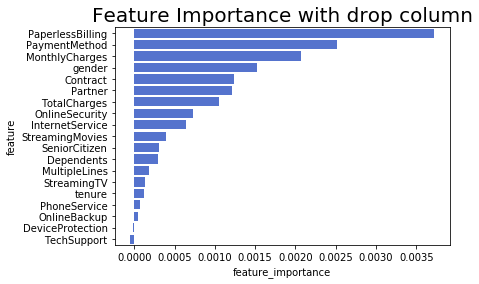

In [85]:
var_imp_plot(drop_importances,'Feature Importance with drop column')

In [230]:
drop_importances.head()

,feature,feature_importance
0,PaperlessBilling,0.003724
1,PaymentMethod,0.002514
2,MonthlyCharges,0.002075
3,gender,0.001523
4,Contract,0.001235


This is wildly different from the feature importance model above. This begs the question, can we rely on these models or do we need to find a way to test multiple, and see what features come up in each?


## Ensemble Feature selection

Since we're seeing some discretion in the different models on how they rank the feature selection, what if we looked into different models, understand that they will attribute importance differently, and then rank according to how many times the variables appear in the top 10 How about let's look at a multiple of models and check the features that would be most 

First set some parameters to make sure we are getting top 10.

In [21]:
feature_name = list(X_train.columns)
# no of maximum features we need to select
num_feats=14

In [22]:
# Pearson correlation

def cor_selector(X, y, num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

# Chi Squared 

def chi_squared(X, y, num_feats):
    X_norm = MinMaxScaler().fit_transform(X)
    chi_selector = SelectKBest(chi2, k=num_feats)
    chi_selector.fit(X_norm, y)
    chi_support = chi_selector.get_support()
    chi_feature = X.loc[:,chi_support].columns.tolist()
    return chi_support, chi_feature

# Recursive Feature Elimination

def rfe_selector(X, y, num_feats):
    X_norm = MinMaxScaler().fit_transform(X)
    rfe_select = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
    rfe_select.fit(X_norm, y)
    rfe_support = rfe_select.get_support()
    rfe_feature = X.loc[:,rfe_support].columns.tolist()
    return rfe_support, rfe_feature

# Random Forest Classifier

def tree_selector(X, y, num_feats):
    rf_model = RandomForestClassifier(n_estimators = 100,
                                      n_jobs = -1,
                                      oob_score = True,
                                      bootstrap = True,
                                      random_state = 35)
    rf_selector = SelectFromModel(rf_model,threshold=-np.inf, max_features = num_feats)
    rf_select = rf_selector.fit(X_train, y_train)
    rf_support = rf_select.get_support()
    rf_feature = X.loc[:,rf_support].columns.tolist()
    return rf_support, rf_feature

# Logistic Regression

def lr_selector(X, y, num_feats):
    X_norm = MinMaxScaler().fit_transform(X)
    lr_select = SelectFromModel(LogisticRegression(penalty="l1"),threshold=-np.inf, max_features = num_feats)
    lr_select.fit(X_norm, y)
    lr_support = lr_select.get_support()
    lr_feature = X.loc[:,lr_support].columns.tolist()
    return lr_support, lr_feature

### Pearson Correlation

In [23]:
cor_support, cor_feature = cor_selector(X_train, y_train, num_feats)
print(str(len(cor_feature)), 'selected features')
#cor_feature


14 selected features


### Chi-squared

In [24]:
chi_support, chi_feature = chi_squared(X_train, y_train, num_feats)
print(str(len(chi_feature)), 'selected features')
#chi_feature

14 selected features


### Recursive Feature Elimination

In [25]:
rfe_support, rfe_feature = rfe_selector(X_train, y_train, num_feats)
print(str(len(rfe_feature)), 'selected features')
#rfe_feature

Fitting estimator with 19 features.
14 selected features


### Random Forest - Tree based

In [26]:
rf_support, rf_feature = tree_selector(X_train, y_train, num_feats)
print(str(len(rf_feature)), 'selected features')
#rf_feature

14 selected features


### Logistic Regression

In [27]:
lr_support, lr_feature = lr_selector(X_train, y_train, num_feats)
print(str(len(lr_feature)), 'selected features')
#lr_feature

14 selected features


Now that we have results for 5 different models, we can start to see some similarities. Lets check on what appears the most often.

In [28]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':lr_support,
                                    'Random Forest':rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(num_feats)

,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,Total
1,tenure,True,True,True,True,True,5
2,TotalCharges,True,True,True,True,True,5
3,PaymentMethod,True,True,True,True,True,5
4,PaperlessBilling,True,True,True,True,True,5
5,InternetService,True,True,True,True,True,5
6,Contract,True,True,True,True,True,5
7,StreamingTV,True,True,True,True,False,4
8,StreamingMovies,True,True,True,True,False,4
9,SeniorCitizen,True,True,True,True,False,4
10,OnlineBackup,True,True,False,True,True,4


We can see that if we were to take 10 different features, these appear in the top 12 most often. How about we make a model with them?

# Machine Learning Model

Let's implement a machine learning model to see if we can't create a model that can predict with relative accuracy, if a client is going to churn or not.

We already know that some variables are more important than others in the model so we can drop others that don't come up as much in importance, but let's also use some of our intuition on the subject to try to determine what other factors we won't need.

There are two values in the dataset that seem like for sure they can be explained by others or will have a high correlation. 

Firstly, TotalCharges and Tenure are features that are very much alike. Simply put, as a client stays on longer, the more money they will have given to the company. So by including both in the model would cause overfitting. Tenure would be more useful in the case of the model.

Secondly, by similar logic, Monthly Charges and Internet Service are features that seem to be correlated. Having no Internet Service and then having DSL or Fiber Optic would change the base costs of how much a client pays per month. For the model, it seems that it would be more useful to include Internet Service than monthly charges.

Recall our correlation heatmap, we can test this and see similar conclusions available for us. So with that, Let's create a dataset to test, train a model and see how it fares.

### Preprocessing

In [78]:
test_df = telco_df

isY = lambda x:int(x=='Yes')
CountServices = lambda row: isY(row['OnlineSecurity']) + isY(row['OnlineBackup']) + isY(row['DeviceProtection']) + isY(row['TechSupport']) + isY(row['StreamingTV']) + isY(row['StreamingMovies'])

test_df['CountServices'] = test_df.apply(CountServices,axis=1)

test_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CountServices
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,2
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0


In [211]:
data_ml = telco_df.drop(['customerID','TotalCharges','MonthlyCharges','DeviceProtection',
                        'MultipleLines','PhoneService','Dependents','gender','Partner'], axis=1)

cat_vars = ['SeniorCitizen',  
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 
            'Contract', 'PaperlessBilling','PaymentMethod']

for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(data_ml[var], prefix=var)
    data1 = data_ml.join(cat_list)
    data_ml = data1
    
cat_vars = ['SeniorCitizen',   
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 
            'Contract', 'PaperlessBilling','PaymentMethod']

data_vars = data_ml.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=data_ml[to_keep]
data_final.columns.values

array(['tenure', 'Churn', 'CountServices', 'SeniorCitizen_0',
       'SeniorCitizen_1', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No',
       'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [192]:
data_final.shape

(7032, 34)

In [212]:
#X_analysis_ml = X_analysis.drop(['Churn','TotalCharges','MonthlyCharges','DeviceProtection',
#                                 'MultipleLines','PhoneService','Dependents','gender','random'], axis = 1)

X_analysis_ml = data_final.drop('Churn', axis=1)
Y_analysis = X_analysis['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X_analysis_ml, Y_analysis, test_size=0.30, random_state=35)

In [194]:
#data_final.columns

### Model 

In [213]:
#The following is the proceduces of how to use k-fold Cross Validation.

classifier = LogisticRegression()

# First we need to train the classifier as usual
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.79


In [214]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



[[1361  169]
 [ 280  300]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1530
           1       0.64      0.52      0.57       580

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.72      2110
weighted avg       0.78      0.79      0.78      2110



We have our model predicting churn with a 79% accuracy. But from this, what can we say are the features most indicative of churn? Since we were looking at a logistic model, we can take a look at the weights (or the coefficients) to start to get some ideas.

In [215]:
## With CountServices
weights = pd.Series(classifier.coef_[0],
                    index=X_train.columns.values)
weights.sort_values(ascending = False)

Contract_Month-to-month                    0.638711
InternetService_Fiber optic                0.389684
OnlineSecurity_No                          0.207612
PaymentMethod_Electronic check             0.203101
TechSupport_No                             0.203032
StreamingTV_Yes                            0.192274
StreamingMovies_Yes                        0.126021
PaperlessBilling_Yes                       0.057601
OnlineBackup_No                            0.052467
SeniorCitizen_1                            0.034842
CountServices                              0.003798
tenure                                    -0.031671
OnlineBackup_Yes                          -0.070929
PaymentMethod_Bank transfer (automatic)   -0.081189
Contract_One year                         -0.099762
PaymentMethod_Mailed check                -0.111959
StreamingMovies_No                        -0.144483
StreamingTV_No                            -0.210736
TechSupport_Yes                           -0.221494
TechSupport_

,index,0
24,Contract_Month-to-month,0.644611
7,InternetService_Fiber optic,0.396167
9,OnlineSecurity_No,0.215136
15,TechSupport_No,0.211236
31,PaymentMethod_Electronic check,0.208512


In [216]:
weights_df = pd.DataFrame(weights).reset_index()
weights_df = weights_df.sort_values(by=[0], ascending = False)
weights_df = weights_df.rename(columns={"index": "Feature", 0: "Importance"})

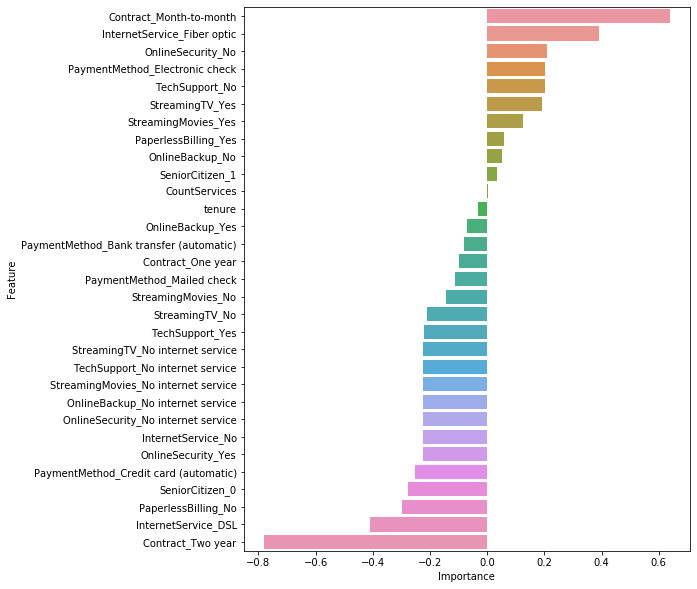

In [217]:
plt.figure(figsize=(8,10))
ax = sns.barplot(x="Importance", y="Feature", data=weights_df)

In [85]:
## With no CountServices
weights = pd.Series(classifier.coef_[0],
                    index=X_train.columns.values)
weights.sort_values(ascending = False)

Contract_Month-to-month                    0.644335
InternetService_Fiber optic                0.398011
OnlineSecurity_No                          0.214073
TechSupport_No                             0.209865
PaymentMethod_Electronic check             0.208786
StreamingTV_Yes                            0.203121
StreamingMovies_Yes                        0.137249
PaperlessBilling_Yes                       0.068712
OnlineBackup_No                            0.058460
SeniorCitizen_1                            0.047063
tenure                                    -0.031341
OnlineBackup_Yes                          -0.060149
PaymentMethod_Bank transfer (automatic)   -0.074208
Partner_No                                -0.086371
Contract_One year                         -0.092718
PaymentMethod_Mailed check                -0.106745
Partner_Yes                               -0.131933
StreamingMovies_No                        -0.138938
StreamingTV_No                            -0.204810
TechSupport_

### Indicators of High Tenure

In [152]:
X_analysis_ml = data_final.drop('tenure', axis=1)
Y_analysis = X_analysis['tenure']

X_train, X_test, y_train, y_test = train_test_split(
    X_analysis_ml, Y_analysis, test_size=0.30, random_state=35)

In [153]:
data_ml = telco_df.drop(['customerID','TotalCharges','MonthlyCharges','DeviceProtection',
                        'MultipleLines','PhoneService','Dependents','gender'], axis=1)

cat_vars = ['SeniorCitizen', 'Partner', 'CountServices',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 
            'Contract', 'PaperlessBilling','PaymentMethod']

for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(data_ml[var], prefix=var)
    data1 = data_ml.join(cat_list)
    data_ml = data1
    
cat_vars = ['SeniorCitizen', 'Partner', 'CountServices', 
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 
            'Contract', 'PaperlessBilling','PaymentMethod']

data_vars = data_ml.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=data_ml[to_keep]
data_final.columns.values

array(['tenure', 'Churn', 'SeniorCitizen_0', 'SeniorCitizen_1',
       'Partner_No', 'Partner_Yes', 'CountServices_0', 'CountServices_1',
       'CountServices_2', 'CountServices_3', 'CountServices_4',
       'CountServices_5', 'CountServices_6', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No',
       'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'P

In [158]:
#The following is the proceduces of how to use k-fold Cross Validation.

from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print('Accuracy of linear regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of linear regression classifier on test set: 0.13


In [160]:
## With no CountServices
weights = pd.Series(regr.coef_[0],
                    index=X_train.columns.values)
weights.sort_values(ascending = False)

PaymentMethod_Mailed check                -6.55594
CountServices_4                           -6.55594
OnlineSecurity_No internet service        -6.55594
OnlineSecurity_No                         -6.55594
InternetService_No                        -6.55594
InternetService_Fiber optic               -6.55594
InternetService_DSL                       -6.55594
CountServices_6                           -6.55594
CountServices_5                           -6.55594
CountServices_3                           -6.55594
OnlineBackup_No                           -6.55594
CountServices_2                           -6.55594
CountServices_1                           -6.55594
CountServices_0                           -6.55594
Partner_Yes                               -6.55594
Partner_No                                -6.55594
SeniorCitizen_1                           -6.55594
SeniorCitizen_0                           -6.55594
OnlineSecurity_Yes                        -6.55594
OnlineBackup_No internet servic

# References

https://www.kaggle.com/mlwhiz/feature-selection-using-football-data

https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

https://www.kaggle.com/jatturat/finding-important-factors-to-survive-titanic

https://towardsdatascience.com/hands-on-predict-customer-churn-5c2a42806266

https://github.com/parrt/random-forest-importances

https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9



In [ ]:
# sns.pairplot(X_analysis[['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection']])
